In [22]:
import keras
from keras.layers import Dense, Dropout, Conv2D, Flatten, Reshape, Activation, Input
from keras.models import Model
from keras.optimizers import RMSprop
from keras.backend import clear_session
from keras.initializers import RandomNormal

import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

# Compositional Pattern Producing Neural Nets

Playing around with neural net initializations & rendering n shit

In [39]:
clear_session()
x_in = Input(shape=(2,))
beta = 25
init = RandomNormal(mean=0, stddev=beta*1/64.0)

def num_dense(in_layer, num, activation='tanh'):
    for x in range(num):
        in_layer = Dense(int(np.random.uniform(low=64, high=512)), 
                         activation=activation, kernel_initializer=init)(in_layer)
    return in_layer

x = num_dense(x_in, 6)
x_out = Dense(3, activation='sigmoid')(x)
model = Model(x_in, x_out)

(1024, 1024, 3)


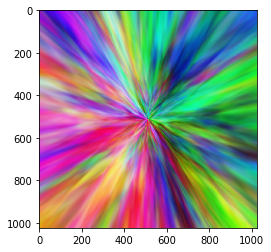

In [63]:
def do_img(model, tl=(0,0), br=(1,1), res=256):
    xs = np.linspace(start=tl[0], stop=br[0], num=res)
    ys = np.linspace(start=tl[1], stop=br[1], num=res)
    
    cols = []
    for x in xs:
        ext_x = x * np.ones((res))
        coords = np.stack([ext_x, ys]).T
        cols.append(model.predict(coords))
    return np.array(cols)

img = do_img(model, tl=(-1, -1), br=(1,1), res=1024)
print(img.shape)
plt.imshow(img)